In [5]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(ggthemes)

In [6]:
data <- read.csv("cyclistic_clean.csv")

In [7]:
            # started_at, ended_at from factor to date/time
data <- mutate(data, started_at = ymd_hms(as.character(started_at)))

data <- mutate(data, ended_at = ymd_hms(as.character(ended_at)))

            # rideid, rideable type from factor to character
data <- mutate(data, ride_id = as.character(ride_id))

data <- mutate(data, rideable_type = as.character(rideable_type))

In [8]:
str(data)

'data.frame':	3473383 obs. of  10 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct, format: "2020-04-26 17:45:14" "2020-04-17 17:08:54" ...
 $ ended_at          : POSIXct, format: "2020-04-26 18:12:03" "2020-04-17 17:17:03" ...
 $ start_station_name: Factor w/ 709 levels "","2112 W Peterson Ave",..: 236 227 429 80 534 445 615 483 382 339 ...
 $ start_station_id  : int  86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : Factor w/ 707 levels "","2112 W Peterson Ave",..: 402 355 325 697 557 613 258 675 376 113 ...
 $ end_station_id    : int  152 499 255 657 323 35 635 382 359 508 ...
 $ member_casual     : Factor w/ 2 levels "casual","member": 2 2 2 2 1 2 2 1 1 2 ...
 $ trip_duration_mins: num  26.8 8.2 14.4 12.2 52.9 5.4 5.2 75.8 5.7 17.3 ...


In [9]:
head(data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_duration_mins
,<chr>,<chr>,<dttm>,<dttm>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member,26.8
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member,8.2
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member,14.4
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,member,12.2
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,casual,52.9
6,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member,5.4


In [10]:
colnames(data)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "member_casual"     
[10] "trip_duration_mins"

In [11]:
summary(data)

   ride_id          rideable_type        started_at                 
 Length:3473383     Length:3473383     Min.   :2020-04-01 00:00:30  
 Class :character   Class :character   1st Qu.:2020-07-14 18:35:04  
 Mode  :character   Mode  :character   Median :2020-08-29 14:35:44  
                                       Mean   :2020-09-10 01:36:04  
                                       3rd Qu.:2020-10-20 21:07:12  
                                       Max.   :2021-03-31 23:59:08  
                                                                    
    ended_at                                    start_station_name 
 Min.   :2020-04-01 00:10:45                             : 122109  
 1st Qu.:2020-07-14 19:05:03   Streeter Dr & Grand Ave   :  35212  
 Median :2020-08-29 15:08:19   Clark St & Elm St         :  32278  
 Mean   :2020-09-10 02:04:03   Lake Shore Dr & Monroe St :  29769  
 3rd Qu.:2020-10-20 21:29:54   Theater on the Lake       :  29570  
 Max.   :2021-04-06 11:00:11   Lake Shor

In [12]:
data %>% filter(trip_duration_mins > 960) %>% 
            group_by(member_casual) %>% 
            summarize(count = n())

member_casual,count
<fct>,<int>
casual,4311
member,620


In [13]:
print("All Riders")
quantile(data$trip_duration_mins)
print("Casual Riders")
quantile(data$trip_duration_mins[data$member_casual == "casual"])
print("Member Riders")
quantile(data$trip_duration_mins[data$member_casual == "member"])

[1] "All Riders"


0%     25%     50%     75%    100% 
    0.1     8.0    14.6    26.7 58720.0

[1] "Casual Riders"


0%     25%     50%     75%    100% 
    0.1    11.6    21.2    40.3 55683.9

[1] "Member Riders"


0%     25%     50%     75%    100% 
    0.1     6.5    11.5    20.1 58720.0

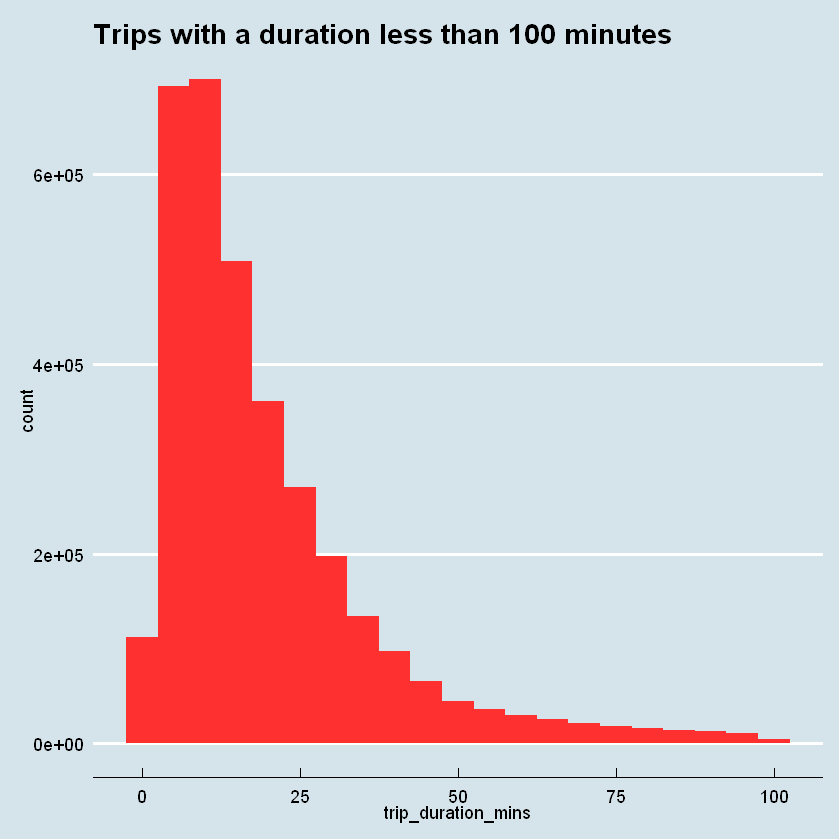

In [17]:
data %>% filter(trip_duration_mins < 100) %>% 
    ggplot(aes(x = trip_duration_mins)) +
        geom_histogram(binwidth = 5, fill = "firebrick1") +
        theme_economist() +
        labs(title = "Trips with a duration less than 100 minutes")

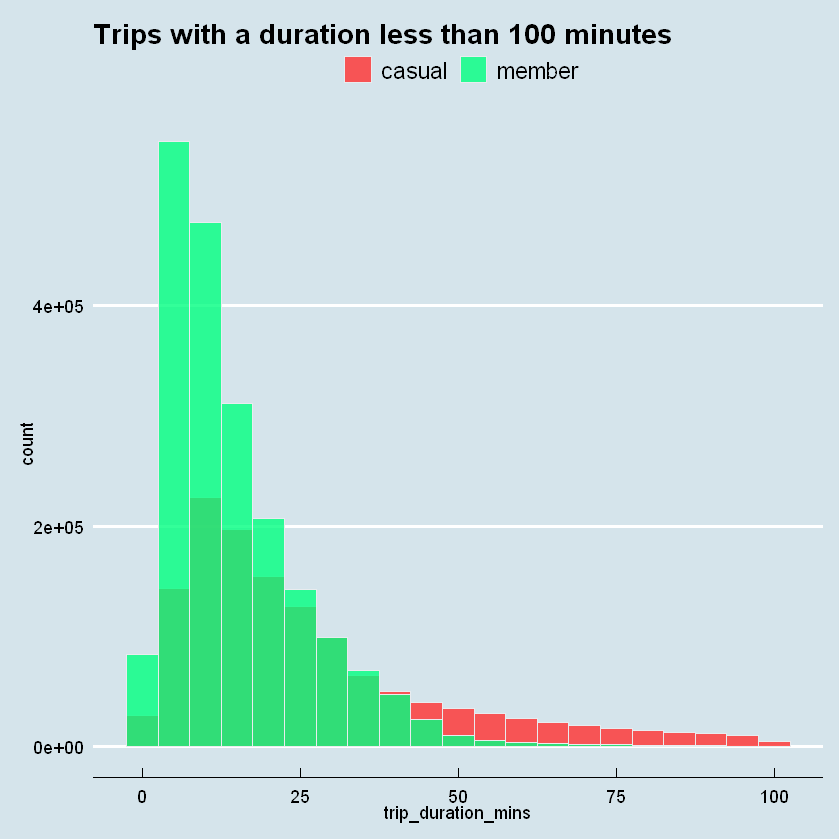

In [20]:
data %>% filter(trip_duration_mins < 100) %>% 
  ggplot( aes(x= trip_duration_mins, fill= member_casual)) +
    geom_histogram( binwidth = 5, color="#e9ecef", alpha=0.8, position = 'identity') +
    scale_fill_manual(values=c("firebrick1", "springgreen")) +
    theme_economist() +
    labs(fill="", title = "Trips with a duration less than 100 minutes")

In [120]:
data %>% 
  filter(trip_duration_mins < 100) %>% 
  group_by(member_casual) %>% 
  summarize(trips = n(),
           mean_trip_duration = round(mean(trip_duration_mins), 1))

member_casual,trips,mean_trip_duration
<fct>,<int>,<dbl>
casual,1332754,26.3
member,2041366,14.9


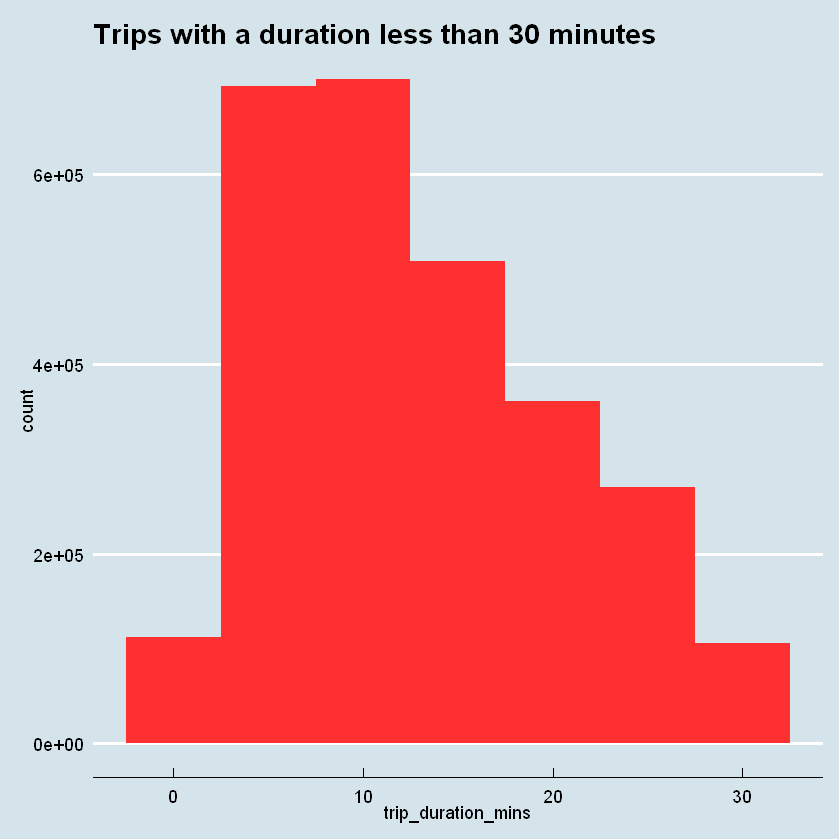

In [21]:
data %>% filter(trip_duration_mins < 30) %>% 
    ggplot(aes(x = trip_duration_mins)) +
        geom_histogram(binwidth = 5, fill = "firebrick1") +
        theme_economist() +
        labs(title = "Trips with a duration less than 30 minutes")

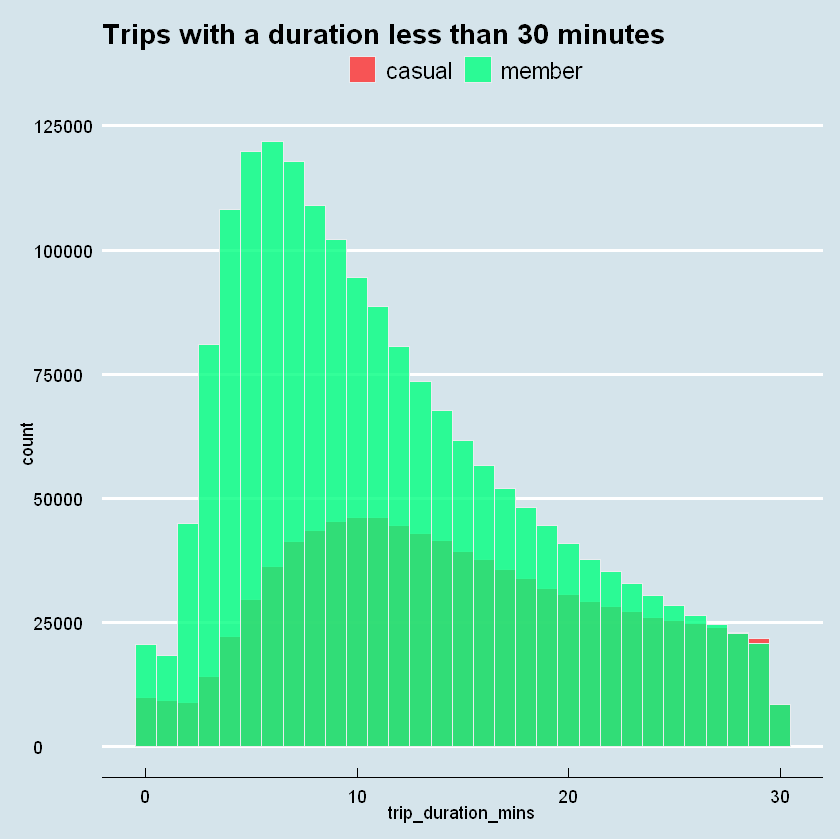

In [22]:
data %>% filter(trip_duration_mins < 30) %>% 
  ggplot( aes(x= trip_duration_mins, fill= member_casual)) +
    geom_histogram( binwidth = 1, color="#e9ecef", alpha=0.8, position = 'identity') +
    scale_fill_manual(values=c("firebrick1", "springgreen")) +
    theme_economist() +
    labs(fill="", title = "Trips with a duration less than 30 minutes")

In [69]:
data %>% 
  filter(trip_duration_mins < 30) %>% 
  group_by(member_casual) %>% 
  summarize(trips = n(),
           mean_trip_duration = mean(trip_duration_mins))

member_casual,trips,mean_trip_duration
<fct>,<int>,<dbl>
casual,930106,14.88291
member,1820762,11.79117


In [23]:
day_data <- data %>% 
    filter(trip_duration_mins < 100) %>% 
    select(trip_duration_mins, member_casual, started_at) %>% 
    mutate(day_of_week = wday(started_at, label = TRUE, abbr = TRUE, week_start = 7)) %>% 
    group_by(day_of_week, member_casual) %>%
    summarize(trips = n(), 
             mean_trip_duration = mean(trip_duration_mins)) %>% 
    arrange(desc(trips))

`summarise()` has grouped output by 'day_of_week'. You can override using the `.groups` argument.



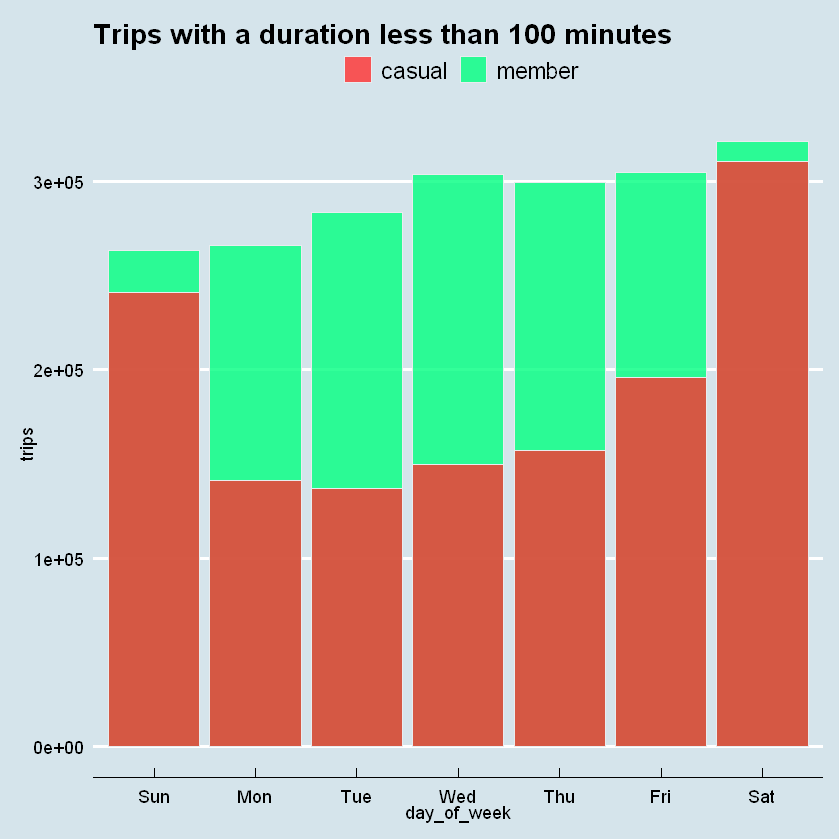

In [24]:
day_data %>%
  ggplot( aes(x= day_of_week, y = trips, fill= member_casual)) +
    geom_col(color="#e9ecef", alpha=0.8, position = 'identity') +
    scale_fill_manual(values=c("firebrick1", "springgreen")) +
    theme_economist() +
    labs(fill="", title = "Trips with a duration less than 100 minutes")

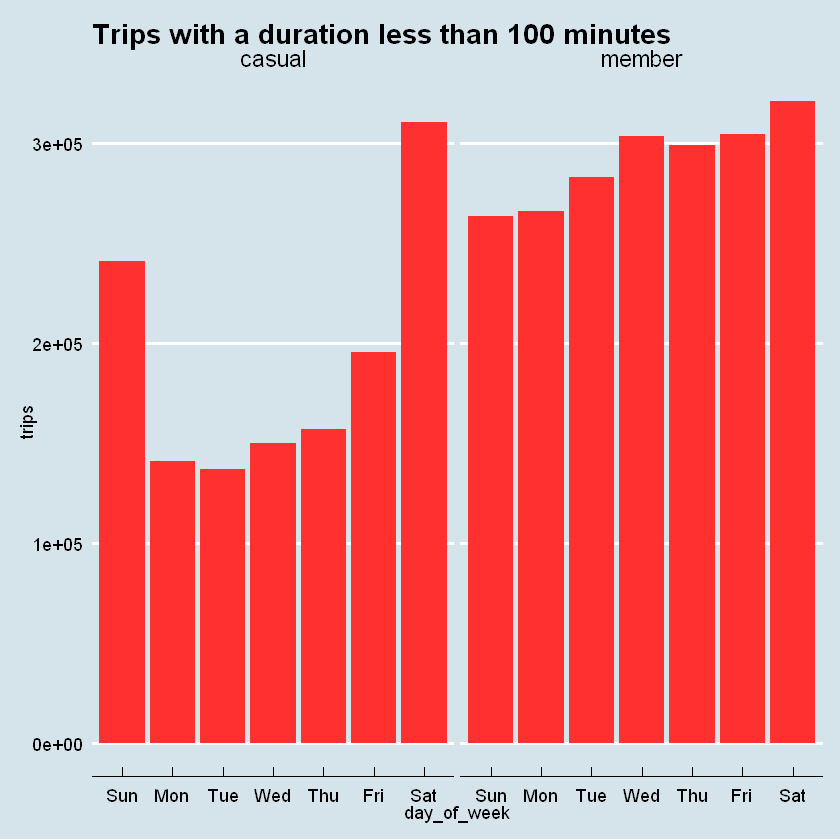

In [28]:
day_data  %>% 
    ggplot(aes(x = day_of_week, y = trips)) +
        geom_col(fill = "firebrick1") +
        theme_economist() +
        labs(fill="", title = "Trips with a duration less than 100 minutes") +
        facet_wrap(~ member_casual, ncol = 2)


In [29]:
data %>% 
    filter(trip_duration_mins < 100) %>% 
    select(trip_duration_mins, member_casual, started_at) %>% 
    mutate(day_of_week = wday(started_at, label = TRUE, abbr = TRUE, week_start = 7)) %>% 
    group_by(day_of_week, member_casual) %>%
    summarize(trips = n()) %>% 
    arrange(desc(trips))

`summarise()` has grouped output by 'day_of_week'. You can override using the `.groups` argument.



day_of_week,member_casual,trips
<ord>,<fct>,<int>
Sat,member,321057
Sat,casual,310336
Fri,member,304730
Wed,member,303713
Thu,member,299107
Tue,member,283154
Mon,member,266109
Sun,member,263496
Sun,casual,241148


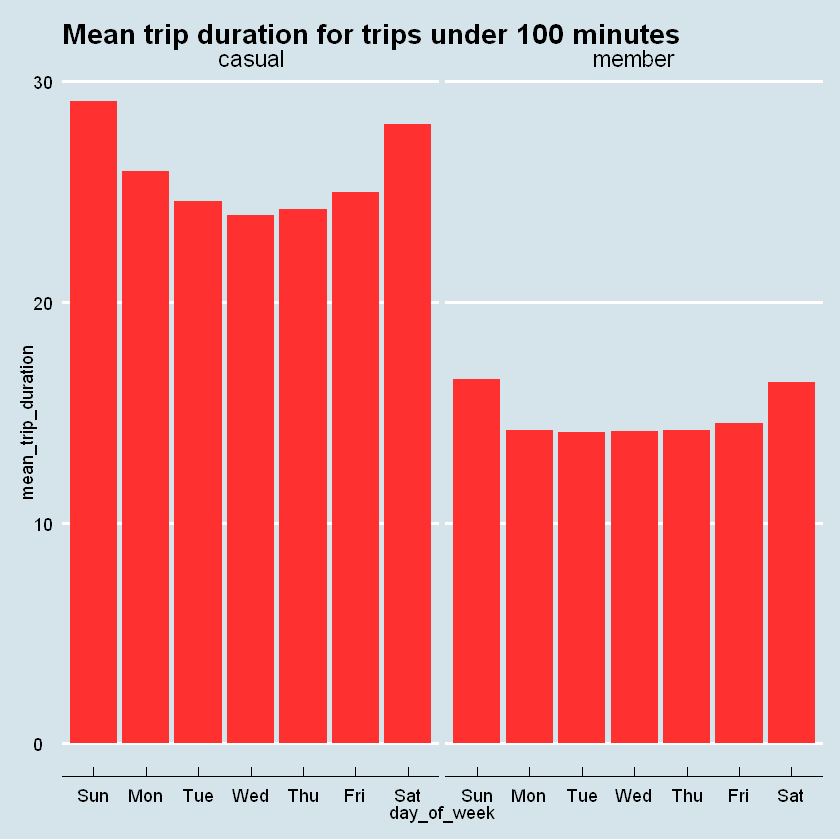

In [30]:
day_data  %>% 
    ggplot(aes(x = day_of_week, y = mean_trip_duration)) +
        geom_col(fill = "firebrick1") +
        theme_economist() +
        labs(fill="", title = "Mean trip duration for trips under 100 minutes") +
        facet_wrap(~ member_casual, ncol = 2)

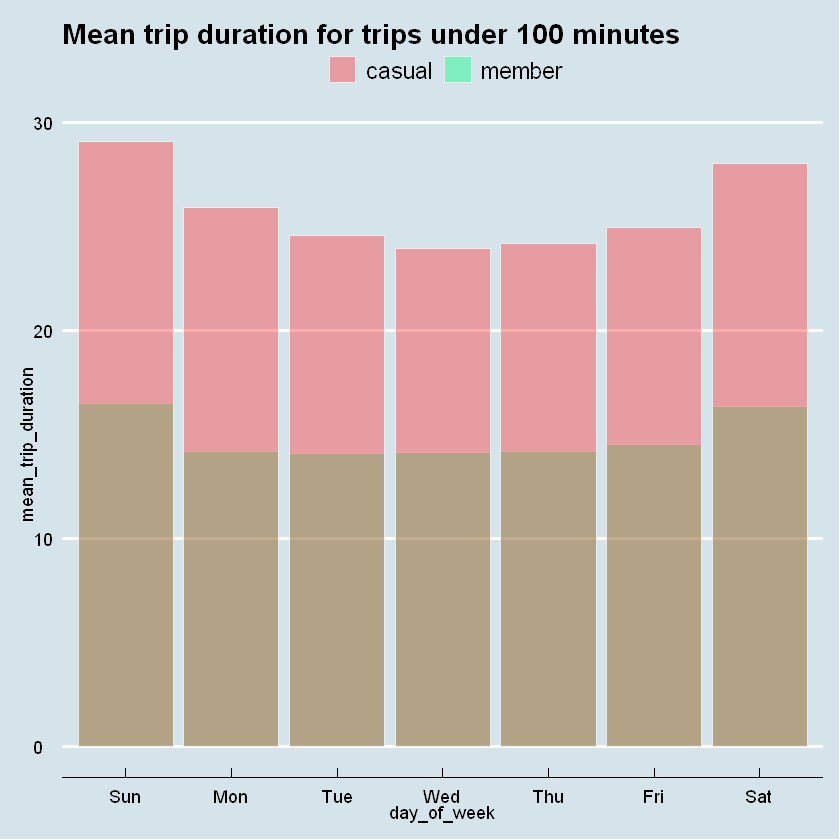

In [31]:
day_data %>%
  ggplot( aes(x= day_of_week, y = mean_trip_duration, fill= member_casual)) +
    geom_col(color="#e9ecef", alpha=0.4, position = 'identity') +
    scale_fill_manual(values=c("firebrick1", "springgreen")) +
    theme_economist() +
    labs(fill="", title = "Mean trip duration for trips under 100 minutes")

In [110]:
day_data

day_of_week,member_casual,trips,mean_trip_duration
<ord>,<fct>,<int>,<dbl>
Sat,member,321057,16.36455
Sat,casual,310336,28.05314
Fri,member,304730,14.51511
Wed,member,303713,14.15391
Thu,member,299107,14.17283
Tue,member,283154,14.09208
Mon,member,266109,14.17836
Sun,member,263496,16.50008
Sun,casual,241148,29.08646


In [52]:
data %>% filter(trip_duration_mins < 100) %>% 
    group_by(member_casual, start_station_name) %>% 
    select(member_casual, start_station_name, end_station_name, trip_duration_mins) %>% 
    summarize(trips = n(),
             mean_trip_duration = mean(trip_duration_mins)) %>% 
    arrange(desc(trips))
    

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,start_station_name,trips,mean_trip_duration
<fct>,<fct>,<int>,<dbl>
member,,75414,12.61437
casual,,45875,17.91057
casual,Streeter Dr & Grand Ave,23829,35.19450
member,Clark St & Elm St,20191,13.34302
casual,Lake Shore Dr & Monroe St,18959,36.30654
casual,Millennium Park,17437,38.08596
member,Broadway & Barry Ave,15658,14.69328
member,Dearborn St & Erie St,15295,13.01472
member,St. Clair St & Erie St,15239,14.98476
